<center><img src="https://javier.rodriguez.org.mx/itesm/2014/tecnologico-de-monterrey-blue.png" width="450" align="center"></center>
<br><p><center><h1><b>Stochastic Optimization: Markov Chains in Financial Simulations</b></h1></center></p> 
<p><center><h3>Course: <i>Stochastic Optimization (Group 652)</i></h3></center></p>
<p><center><h4>Instructed by: <i>Dr. Hugo E. Ramirez J.</i></h4></center></p> 

<p style="text-align: right;">Alejandro Santiago Baca Eyssautier - A01656580</p> 
<p style="text-align: right;">André Colín Avila - A01657474</p> 
<p style="text-align: right;">November 14th, 2024</p><br>

<br><p><h3> <b>Introduction</b></h3></p>

This project explores the application of Markov chain theory within a financial market context. Specifically, it simulates price movements of a financial asset as a discrete-time Markov process. The model allows us to analyze potential investment outcomes, such as achieving a profit or reaching a stop-loss limit, by using transition probabilities between various price states. The goal is to simulate and understand the likelihood and timing of reaching critical investment levels (Take-Profit, TP, and Stop-Loss, SL) in this stochastic setting.

The price of an asset is modeled as a Markov chain with discrete states centered around a mean price $\bar{S}$, with fluctuations allowed up to four increments above or below this mean. The transition probabilities between these states are defined in a matrix, allowing us to simulate potential price paths over time. The project entails simulating these paths, calculating the probability of hitting TP or SL levels, and analyzing the expected time to reach these states. Further, the model considers an iterative process where investments resume once the price returns to the mean, providing insights into long-term investment returns.

<br><p><h3> <b>Variable Description</b></h3></p>

- **$\bar{S}$**: Mean price level around which the asset price fluctuates.
- **$\Delta S$**: Incremental step size in the asset price, determining the distance between adjacent states.
- **$\eta$**: Initial distribution, representing the probability distribution of starting states for the price.
- **$N$**: Maximum number of simulation steps, or the time horizon for the simulation.
- **SL (Stop-Loss)**: Threshold at which an investor would sell to prevent further loss, set at two increments below the mean ($\bar{S} - 2\Delta S$).
- **TP (Take-Profit)**: Threshold at which an investor would sell to realize profit, set at three increments above the mean ($\bar{S} + 3\Delta S$).
- **Transition Matrix $(P_i)$**: Defines the probabilities of moving between different price states in the Markov process.

<br><p><h3> <b>Section 1: Initial Setup and Simulation</b></h3></p>

<br>

- **Exercise 1: Define Initial Values**

In this section, we assign values to key variables such as $\bar{S}$, $\Delta S$, $\eta$, and $N$. The chosen values will depend on the market conditions or assumptions set for this simulation. For example, we might set $\bar{S} = 100$ (an arbitrary mean price), $\Delta S = 5$, and define $\eta$ as a distribution focused on state 4, indicating that the price is set to start at the mean price level $\bar{S}$.

In [57]:
# Define initial values
S_bar = 100  # Mean price level
Delta_S = 5  # Incremental step size
N = 100  # Maximum number of steps to simulate
eta = [0, 0, 0, 0, 1, 0, 0, 0, 0] # Intial distribution focused on state 4

<br>

- **Exercise 2: Simulate Markov Chain Realizations**

This step involves implementing a function that simulates the sequence of price states using the transition matrix $P_{ij}$, where $P_{ij}$ represents the transition probability from state $i$ to state $j$. The simulation follows the Markov process, where each state transition is probabilistically determined by $P_{ij}$, moving to adjacent states according to the defined probabilities.

In [58]:
import numpy as np

# Define transition matrix
P_i = np.array([
    [0.3, 0.7, 0, 0, 0, 0, 0, 0, 0],
    [0.3, 0, 0.5, 0.2, 0, 0, 0, 0, 0],
    [0, 0.25, 0, 0.7, 0.05, 0, 0, 0, 0],
    [0, 0.05, 0.4, 0, 0.55, 0, 0, 0, 0],
    [0, 0, 0, 0.15, 0, 0.35, 0.5, 0, 0],
    [0, 0, 0, 0.05, 0.5, 0, 0.45, 0, 0],
    [0, 0, 0, 0, 0, 0.2, 0, 0.6, 0.2],
    [0, 0, 0, 0, 0, 0.1, 0.3, 0, 0.6],
    [0, 0, 0, 0, 0, 0, 0.5, 0.5, 0] 
])

# Function to simulate a single Markov chain realization
def simulate_markov_chain(P, initial_state, N):
    states = [initial_state]
    for _ in range(N - 1):
        current_state = states[-1]
        next_state = np.random.choice(range(len(P)), p=P[current_state])
        states.append(next_state)
    return states

# Simulate a Markov chain realization
initial_state = np.random.choice(range(len(P_i)), p=eta)
markov_chain_simulation = simulate_markov_chain(P_i, initial_state, N)
print('First 15 states of the Markov chain simulation:\n', markov_chain_simulation[:15])

First 15 states of the Markov chain simulation:
 [4, 6, 5, 4, 6, 8, 6, 5, 6, 7, 8, 7, 6, 5, 4]


<br>

*Explanation*: This code simulates the Markov chain. Starting from an initial state determined by $\eta$, it transitions between states for $N$ steps based on $P_i$. The `simulate_markov_chain` function uses numpy's `random.choice` to select the next state according to the current state's transition probabilities.

<br>

- **Exercise 3: Identify TP and SL Points in a Simulation**

With the simulated Markov chain sequence from Exercise 2, the next step is to check if and when the price hits the TP or SL thresholds. This involves iterating through the simulation and marking the points at which the price reaches either threshold.

In [59]:
# Define thresholds for SL and TP
SL = S_bar - 2 * Delta_S
TP = S_bar + 3 * Delta_S

# Function to check for SL and TP points in the simulation
def check_thresholds(simulation, SL, TP, S_bar, Delta_S):
    sl_reached = False
    tp_reached = False
    for idx, state in enumerate(simulation):
        price = S_bar + (state - 4) * Delta_S  # -4 to center the states around 0
        if price <= SL:
            sl_reached = True
            sl_step = idx
            break
        elif price >= TP:
            tp_reached = True
            tp_step = idx
            break
    return sl_reached, tp_reached, sl_step if sl_reached else tp_step

# Check for SL and TP points in the simulation
sl_reached, tp_reached, threshold_step = check_thresholds(markov_chain_simulation, SL, TP, S_bar, Delta_S)
if sl_reached:
    print('Stop-loss reached at step', threshold_step)
elif tp_reached:
    print('Take-profit reached at step', threshold_step)
else:
    print('Neither stop-loss nor take-profit reached')

Take-profit reached at step 5


<br>

*Explanation*: This code checks each step in the simulation to see if it reaches either the SL or TP threshold. It calculates the price for each state based on $\bar{S}$ and $\Delta S$ and flags the first occurrence of either threshold, recording the step index. States are adjusted by subtracting 4 to center them around $\bar{S}$. The function returns whether SL or TP was reached and at which step.


<br>

<br><p><h3> <b>Section 2: Theoretical and Empirical Analysis of Hitting Probabilities</b></h3></p>

<br>

- **Exercise 4: Simulating Realizations to Calculate Probabilities of Hitting SL and TP**

In this exercise, we aim to simulate multiple realizations of the Markov chain to determine the probability of reaching the Stop-Loss (SL) or Take-Profit (TP) thresholds. By running these simulations, we can estimate the likelihood of hitting SL or TP, and later compare our findings to theoretical probabilities.

In [60]:
# Function to simulate multiple runs of the Markov chain and calculate SL and TP probabilities
def simulate_multiple_runs(P, eta, N, SL, TP, S_bar, Delta_S, num_simulations):
    sl_hits = 0
    tp_hits = 0
    
    # Run each simulation
    for _ in range(num_simulations):
        # Sample initial state based on eta
        initial_state = np.random.choice(range(len(P)), p=eta)
        
        # Simulate the Markov chain
        simulation = simulate_markov_chain(P, initial_state, N)
        
        # Check if SL or TP was reached
        sl_reached, tp_reached, _ = check_thresholds(simulation, SL, TP, S_bar, Delta_S)
        
        # Count occurrences of SL and TP hits
        if sl_reached:
            sl_hits += 1
        elif tp_reached:
            tp_hits += 1

    # Calculate probabilities
    sl_probability = sl_hits / num_simulations
    tp_probability = tp_hits / num_simulations

    return sl_probability, tp_probability

# Run multiple simulations and calculate SL and TP probabilities
num_simulations = 50000
sl_probability, tp_probability = simulate_multiple_runs(P_i, eta, N, SL, TP, S_bar, Delta_S, num_simulations)
print(f"Empirical Probability of Reaching SL: {sl_probability} \nEmpirical Probability of Reaching TP: {tp_probability}")

Empirical Probability of Reaching SL: 0.11738 
Empirical Probability of Reaching TP: 0.88262


<br>

*Explanation:*

- **`simulate_multiple_runs`**: This function orchestrates the entire simulation process. For each run, it starts with an initial state sampled according to the initial distribution `eta`, simulates the Markov chain, and then checks if SL or TP was reached.
- **Counting Hits**: For each simulation, it increments the count for SL or TP based on which threshold was reached, and then calculates the probabilities by dividing the number of SL and TP hits by the total number of simulations.

<br>

***Theoretical Approach***

In order to calculate the theoretical probabilities of reaching either the Stop-Loss (SL) or the Take-Profit (TP) thresholds, starting from the central state (i.e. state 4, which represents the mean price level ($\bar{S}$)), we can model this as a problem of calculating **hitting probabilities** in a finite-state Markov chain, where we seek the probability of reaching TP before SL and vice versa.

The objective is to calculate the probability of hitting TP before SL (denoted as $P_{\text{TP}}$) and the probability of hitting SL before TP (denoted as $P_{\text{SL}}$) by solving a system of linear equations derived from the transition probabilities of the Markov chain. 

We know from the **Convergence Theorem** that, since this chain is irreducible, positive recurrent, and aperiodic; there exists a unique stationary distribution and, therefore, we can calculate these hitting probabilities as follows:

<br>

***Defining the Hitting Probabilities***

Let $h_i$ represent the probability of reaching TP before SL starting from state $i$. Our goal is to calculate $h_4$, the probability of reaching TP before SL starting from state 4.

For each state $i$, the probability $h_i$ satisfies the equation:

$$
h_i = \begin{cases}
1 & \text{if state } i \text{ corresponds to TP} \\
0 & \text{if state } i \text{ corresponds to SL} \\
\sum_{j=0}^{8} P_{ij} h_j & \text{otherwise}
\end{cases}
$$

Where:

- $P_{ij}$ is the probability of transitioning from state $i$ to state $ j $.

<br>

First, we need to identify which states correspond to SL and TP (which we will later refer to as '**absorbing**' states). Given that our states are numbered from 0 to 8 and centered around state 4 ($ \bar{S} $), we can calculate the price for each state:

$$\text{Price at state } i = \bar{S} + (i - 4) \Delta S $$

Thus, 

- **States Corresponding to SL**:

  - Price $\leq \bar{S} - 2\Delta S$
  - $ \bar{S} + (i_{\text{SL}} - 4) \Delta S \leq \bar{S} - 2\Delta S $
  - Solving for $ i_{\text{SL}} $:

  $$
  \bar{S} + (i_{\text{SL}} - 4) \Delta S \leq \bar{S} - 2\Delta S \\
  (i_{\text{SL}} - 4) \Delta S \leq -2\Delta S \\
  i_{\text{SL}} - 4 \leq -2 \\
  i_{\text{SL}} \leq 2
  $$

  - Therefore, states 0, 1, and 2 correspond to SL (i.e. they are absorbing states for *Stop-Loss*).

- **States Corresponding to TP**:

  - Price $ \geq \bar{S} + 3\Delta S$
  - $ \bar{S} + (i_{\text{TP}} - 4) \Delta S \geq \bar{S} + 3\Delta S $
  - Solving for $ i_{\text{TP}} $:

  $$
  (i_{\text{TP}} - 4) \Delta S \geq 3\Delta S \\
  i_{\text{TP}} - 4 \geq 3 \\
  i_{\text{TP}} \geq 7
  $$

  - Therefore, states 7 and 8 correspond to TP (i.e. they are absorbing states for *Take-Profit*).

- **Transient States**: 

   - Correspond to states 3, 4, 5, and 6, where the price can fluctuate without immediately reaching either SL or TP.

<br>

We can redefine our hitting probability, $h_i$, for each state as follows:

$$
h_i = \begin{cases}
1 & \text{if state } i \in \{ 7, 8 \} \\
0 & \text{if state } i \in \{ 0, 1, 2 \} \\
\sum_{j=3}^{8} P_{ij} h_j & \text{if state i} \in \{ 3, 4, 5, 6 \}
\end{cases}
$$

<br>

***System of Equations for Transient States***

We can set up a system of equations for the transient states (3, 4, 5, and 6) by using the transition probabilities from the transition matrix and the derived expression for $h_i$ using the **Law of Total Probability**. 

1. **For state 3**:

   $$h_3 = P_{33} h_3 + P_{34} h_4 + P_{35} h_5 + P_{36} h_6 + P_{37} h_7 + P_{38} h_8 $$

   Substituting $P_{33} = P_{35} = P_{36} = P_{37} = P_{38} = 0$ and $P_{34} = 0.55$ from the transition matrix $P_i$:

   $$h_3 = 0.55 h_4$$

2. **For state 4**:

   $$h_4 = P_{43} h_3 + P_{44} h_4 + P_{45} h_5 + P_{46} h_6 + P_{47} h_7 + P_{48} h_8 $$

   Substituting $P_{44} = P_{47} = P_{48} = 0$ and $P_{43} = 0.15$, $P_{45} = 0.35$, $P_{46} = 0.5$ from the transition matrix $P_i$:

   $$h_4 = 0.15 h_3 + 0.35 h_5 + 0.5 h_6$$

3. **For state 5**:

   $$h_5 = P_{53} h_3 + P_{54} h_4 + P_{55} h_5 + P_{56} h_6 + P_{57} h_7 + P_{58} h_8 $$

   Substituting $P_{55} = P_{57} = P_{58} = 0$ and $P_{53} = 0.05$, $P_{54} = 0.5$, $P_{56} = 0.45$ from the transition matrix $P_i$:

   $$h_5 = 0.05 h_3 + 0.5 h_4 + 0.45 h_6$$

4. **For state 6**:

   $$h_6 = P_{63} h_3 + P_{64} h_4 + P_{65} h_5 + P_{66} h_6 + P_{67} h_7 + P_{68} h_8 $$

   Substituting $P_{63} = P_{64} = P_{66} = 0$ and $P_{65} = 0.2$, $P_{67} = 0.6$, $P_{68} = 0.2$ from the transition matrix $P_i$, and $h_7 = h_8 = 1$:

   $$ h_6 = 0.2 h_5 + 0.6 \cdot 1 + 0.2 \cdot 1$$
   $$ h_6 = 0.2 h_5 + 0.8 $$

<br>

Therefore, the final system of equations is set as follows:

$$
\begin{cases}
h_3 - 0.55 h_4 = 0 \\
0.15 h_3 - h_4 + 0.35 h_5 + 0.5 h_6 = 0 \\
0.05 h_3 + 0.5 h_4 - h_5 + 0.45 h_6 = 0 \\
-0.2 h_5 + h_6 = 0.8
\end{cases}
$$

<br>

***Solving the System of Equations***

In order to solve the system of equations, we perform Gauss-Jordan Elimination to do row-wise operations for finding $h_3, h_4, h_5$ and $h_6$. However, to reduce the number of calculations in the document, we will only show the initial system and the final result:

$$

\begin{pmatrix}
1 & -0.55 & 0 & 0 &\bigm| & 0 \\
0.15 & -1 & 0.35 & 0.5 &\bigm| & 0 \\
0.05 & 0.5 & -1 & 0.45 &\bigm| & 0 \\
0 & 0 & -0.2 & 1 &\bigm| & 0.8
\end{pmatrix}

\Leftrightarrow

\begin{pmatrix}
1 & 0 & 0 & 0 &\bigm| & \frac{5786}{11951} \\
0 & 1 & 0 & 0 &\bigm| & \frac{10520}{11951} \\
0 & 0 & 1 & 0 &\bigm| & \frac{10826}{11951} \\
0 & 0 & 0 & 1 &\bigm| & \frac{11726}{11951}
\end{pmatrix}

$$

Thus, the hitting probabilities $h_i$ (i.e. the probability of reaching TP before SL starting from state $i$) for the transient states 3, 4, 5, and 6 are:

$$
\begin{cases}
h_3 = \frac{5786}{11951} \\
h_4 = \frac{10520}{11951} \\
h_5 = \frac{10826}{11951} \\
h_6 = \frac{11726}{11951}
\end{cases}
$$

<br>

***Final Probabilities***

Recalling that, our goal is to find $h_4$, the probability of reaching TP before SL starting from state 4, we can express the theoretical probabilities as follows:

- Theoretical probability of reaching TP: **$ P_{\text{TP}}^{\text{theoretical}} = h_4 \approx 0.8803 $**
- Theoretical probability of reaching SL: **$ P_{\text{SL}}^{\text{theoretical}} = 1 - h_4 \approx 0.1197 $**

<br>

***Empirical and Theoretical Comparison***

If we compare these theoretical probabilities with the empirical results obtained from simulations, we expect a close match. For instance, if our simulations yield:

- Empirical probability of reaching TP: **$ P_{\text{TP}}^{\text{empirical}} \approx 0.8826 $**
- Empirical probability of reaching SL: **$ P_{\text{SL}}^{\text{empirical}} \approx 0.1174 $**

Then, the empirical and theoretical probabilities are in strong agreement, validating the accuracy of our model and approach.

<br>

<br><p><h3> <b>Section 3: Empirical and Theoretical Analysis of Expected Stopping Times</b></h3></p>

<br>

- **Exercise 5: Calculation of Expected Stopping Time for TP and SL**

In this exercise, we aim to calculate the expected time required to reach either the Take-Profit (TP) or Stop-Loss (SL) thresholds, starting from the initial state, when only one of these outcomes can occur. This theoretical approach will help us derive the expected stopping times for reaching each threshold independently and will later be compared with the empirical results from the simulations.

We know that by **first step analysis**, the expected stopping time can be computed using the following approach.

<br>

***Theoretical Approach***

In order to calculate the expected stopping time to reach either TP or SL from the initial state 4 (which represents the mean price level ($\bar{S}$)), we will set up and solve a system of linear equations that represent the expected hitting times to reach the absorbing states (TP or SL) starting from each transient state.

<br>

***Defining Expected Stopping Times***

Let $ E_i^{\text{TP}} $ denote the expected time to reach TP from state $ i $, and $ E_i^{\text{SL}} $ denote the expected time to reach SL from state $ i $.

The expected stopping times satisfy the following equations:

$$
E_i = \begin{cases}
0 & \text{if state } i \text{ corresponds to the absorbing state (TP or SL)} \\
1 + \sum_{j=0}^{8} P_{ij} E_j & \text{otherwise}
\end{cases}
$$

where:
- $ P_{ij} $ is the probability of transitioning from state $ i $ to state $ j $,
- $ E_i $ represents the expected time to reach either TP or SL starting from state $ i $, depending on which absorbing boundary we are considering (TP or SL).
- The absorbing states belong to indices 0, 1 and 2, or, indices 7 and 8 for SL or TP respectively, which we already analyzed on the previous exercise.

Since we are calculating the expected time to reach each boundary independently, we will need to set up separate systems of equations for each scenario.

<br>

***Expected Stopping Time to Reach TP***

For states corresponding to TP (states 7 and 8), we set the absorbing conditions: $ E_7^{\text{TP}} = 0 $ and $ E_8^{\text{TP}} = 0 $, since these are absorbing states for the TP threshold. For states corresponding to SL (states 0, 1 and 2): $ E_i^{\text{TP}} $ is undefined or not applicable, as we are assuming SL cannot be reached in this calculation. For each transient state, the expected time to reach TP is calculated by summing the probability-weighted expected times for each possible next state, plus 1 step for the transition itself: 

1. **For state 3**:

    $$ E_3^{\text{TP}} = 1 + \sum_{j=3}^{8} P_{3j} E_j^{\text{TP}} $$

    Substituting $P_{33} = P_{35} = P_{36} = P_{37} = P_{38} = 0$ and $P_{34} = 0.55$ from the transition matrix $P_i$:

    $$ E_3^{\text{TP}} = 1 + (0.55 \cdot E_4^{\text{TP}}) $$

2. **For state 4**:

    $$ E_4^{\text{TP}} = 1 + \sum_{j=3}^{8} P_{4j} E_j^{\text{TP}} $$

    Substituting $ P_{44} = P_{47} = P_{48} = 0 $ and $ P_{43} = 0.15, P_{45} = 0.35, P_{46} = 0.5 $ from the transition matrix $P_i$:

    $$ E_4^{\text{TP}} = 1 + (0.15 \cdot E_3^{\text{TP}}) + (0.35 \cdot E_5^{\text{TP}}) + (0.5 \cdot E_6^{\text{TP}}) $$

3. **For state 5**:

    $$ E_5^{\text{TP}} = 1 + \sum_{j=3}^{8} P_{5j} E_j^{\text{TP}} $$

    Substituting $ P_{55} = P_{57} = P_{58} = 0 $ and $ P_{53} = 0.05, P_{54} = 0.5, P_{56} = 0.45 $ from the transition matrix $P_i$:


    $$ E_5^{\text{TP}} = 1 + (0.05 \cdot E_3^{\text{TP}}) + (0.5 \cdot E_4^{\text{TP}}) + (0.45 \cdot E_6^{\text{TP}}) $$

4. **For state 6**:

    $$ E_6^{\text{TP}} = 1 + \sum_{j=3}^{8} P_{6j} E_j^{\text{TP}} $$

    Substituting $ P_{63} = P_{64} = P_{66} = 0 $ and $ P_{65} = 0.2$ from the transition matrix $P_i$, and $E_7^{\text{TP}} = E_8^{\text{TP}} = 0$:

    $$ E_6^{\text{TP}} = 1 + (0.2 \cdot E_5^{\text{TP}}) $$

<br>

Therefore, we can arrange our transient expected stopping times equations into the following system:

$$
\begin{cases}
E_3^{\text{TP}} = 1 + 0.55 \cdot E_4^{\text{TP}} \\
E_4^{\text{TP}} = 1 + 0.15 \cdot E_3^{\text{TP}} + 0.35 \cdot E_5^{\text{TP}} + 0.5 \cdot E_6^{\text{TP}} \\
E_5^{\text{TP}} = 1 +  0.05 \cdot E_3^{\text{TP}} + 0.5 \cdot E_4^{\text{TP}} + 0.45 \cdot E_6^{\text{TP}} \\
E_6^{\text{TP}} = 1 + 0.2 \cdot E_5^{\text{TP}}
\end{cases}
$$

Simplyfing for $ E_i^{\text{TP}} $, the final system of equations is set as follows:

$$
\begin{cases}
E_3^{\text{TP}} - 0.55 \cdot E_4^{\text{TP}} = 1 \\
- 0.15 \cdot E_3^{\text{TP}} + E_4^{\text{TP}} - 0.35 \cdot E_5^{\text{TP}} - 0.5 \cdot E_6^{\text{TP}} = 1 \\
- 0.05 \cdot E_3^{\text{TP}} - 0.5 \cdot E_4^{\text{TP}} + E_5^{\text{TP}} - 0.45 \cdot E_6^{\text{TP}} = 1 \\
- 0.2 \cdot E_5^{\text{TP}} + E_6^{\text{TP}} = 1
\end{cases}
$$

In order to solve the system of equations, we perform Gauss-Jordan Elimination to do row-wise operations for finding $ E_3^{\text{TP}}, E_4^{\text{TP}}, E_5^{\text{TP}}, E_6^{\text{TP}} $. However, to reduce the number of calculations in the document, we will only show the initial system and the final result:

$$

\begin{pmatrix}
1 & - 0.55 & 0 & 0 &\bigm| & 1 \\
- 0.15 & 1 & - 0.35 & - 0.5 &\bigm| & 1 \\
- 0.05 & - 0.5 & 1 & - 0.45 &\bigm| & 1 \\
0 & 0 & - 0.2 & 1 & \bigm| & 1
\end{pmatrix}

\Leftrightarrow

\begin{pmatrix}
1 & 0 & 0 & 0 &\bigm| & \frac{71785}{23902} \\
0 & 1 & 0 & 0 &\bigm| & \frac{43530}{11951} \\
0 & 0 & 1 & 0 &\bigm| & \frac{89865}{23902} \\
0 & 0 & 0 & 1 &\bigm| & \frac{41875}{23902}
\end{pmatrix}

$$

Thus, the expected stopping times to reach TP $ E_i^{\text{TP}} $ for the transient states 3, 4, 5, and 6 are:

$$
\begin{cases}
E_3^{\text{TP}} = \frac{71785}{23902} \approx 3.003 \\
E_4^{\text{TP}} = \frac{43530}{11951} \approx 3.642\\
E_5^{\text{TP}} = \frac{89865}{23902} \approx 3.780\\
E_6^{\text{TP}} = \frac{41875}{23902} \approx 1.752
\end{cases}
$$

<br>

***Expected Stopping Time to Reach SL***

For states corresponding to SL (states 0, 1, and 2), we set the absorbing conditions: $ E_0^{\text{SL}} = 0 $, $ E_1^{\text{SL}} = 0 $, and $ E_2^{\text{SL}} = 0 $. For states corresponding to TP (states 7 and 8): $ E_i^{\text{SL}} $ is undefined or not applicable, as we are assuming TP cannot be reached in this calculation. For each transient state, the expected time to reach SL is calculated similarly to TP, summing the probability-weighted expected times for each possible next state, plus 1 step for the transition.

Since the transition matrix structure is identical for both scenarios, the system of equations for the expected stopping times to reach SL is the same as the one we derived for TP:

$$
\begin{cases}
E_3^{\text{SL}} = 1 + 0.55 \cdot E_4^{\text{SL}} \\
E_4^{\text{SL}} = 1 + 0.15 \cdot E_3^{\text{SL}} + 0.35 \cdot E_5^{\text{SL}} + 0.5 \cdot E_6^{\text{SL}} \\
E_5^{\text{SL}} = 1 + 0.05 \cdot E_3^{\text{SL}} + 0.5 \cdot E_4^{\text{SL}} + 0.45 \cdot E_6^{\text{SL}} \\
E_6^{\text{SL}} = 1 + 0.2 \cdot E_5^{\text{SL}}
\end{cases}
$$

Therefore, by solving this system, we obtain the same values as those for $ E_i^{\text{TP}} $:

$$
\begin{cases}
E_3^{\text{SL}} = \frac{71785}{23902} \approx 3.003 \\
E_4^{\text{SL}} = \frac{43530}{11951} \approx 3.642 \\
E_5^{\text{SL}} = \frac{89865}{23902} \approx 3.780 \\
E_6^{\text{SL}} = \frac{41875}{23902} \approx 1.752
\end{cases}
$$

<br>

***Final Expected Times***

Recalling that, our goal is to find $E_4^{\text{TP}}$ and $E_4^{\text{SL}}$, the expected stopping times to reach TP and SL, starting from state 4, we can express the theoretical calculations as follows:

- Theoretical expected stopping time to reach TP: **$ E_4^{\text{theoretical TP}} \approx 3.6424 $**
- Theoretical expected stopping time to reach SL: **$ E_4^{\text{theoretical SL}} \approx 3.6424 $**

The identical expected stopping times for reaching TP and SL arise from the structure of the system of equations generated by the first-step analysis. Even though the probability of reaching TP is significantly higher than reaching SL, the average time to reach either threshold is the same when calculated independently, due to the Markov chain’s configuration and transition structure.

<br>

***Simulation of Expected Stopping Times for TP and SL***

To complement the theoretical analysis, we perform Monte Carlo simulations to empirically estimate the expected stopping times for reaching the Take-Profit (TP) and Stop-Loss (SL) thresholds.

In [61]:
# Function to simulate multiple runs and calculate SL and TP expected stopping times
def simulate_multiple_runs_with_times(P, eta, N, SL, TP, S_bar, Delta_S, num_simulations):
    sl_hits = 0
    tp_hits = 0
    sl_total_time = 0
    tp_total_time = 0
    
    # Run each simulation
    for _ in range(num_simulations):
        # Sample initial state based on eta
        initial_state = np.random.choice(range(len(P)), p=eta)
        
        # Simulate the Markov chain
        simulation = simulate_markov_chain(P, initial_state, N)
        
        # Check if SL or TP was reached and record the stopping time
        sl_reached, tp_reached, threshold_step = check_thresholds(simulation, SL, TP, S_bar, Delta_S)
        
        if sl_reached:
            sl_hits += 1
            sl_total_time += threshold_step  # Accumulate the steps taken to reach SL
        elif tp_reached:
            tp_hits += 1
            tp_total_time += threshold_step  # Accumulate the steps taken to reach TP
    
    # Calculate expected stopping times (only if hits occurred to avoid division by zero)
    expected_time_sl = sl_total_time / sl_hits if sl_hits > 0 else float('inf')
    expected_time_tp = tp_total_time / tp_hits if tp_hits > 0 else float('inf')

    return expected_time_sl, expected_time_tp

# Run the simulation with stopping time calculation
num_simulations = 50000
expected_time_sl, expected_time_tp = simulate_multiple_runs_with_times(P_i, eta, N, SL, TP, S_bar, Delta_S, num_simulations)
print(f"Empirical Expected Stopping Time to Reach SL: {expected_time_sl} \nEmpirical Expected Stopping Time to Reach TP: {expected_time_tp}")

Empirical Expected Stopping Time to Reach SL: 3.436448442445444 
Empirical Expected Stopping Time to Reach TP: 3.669204718503534


<br>

*Explanation:* The function `simulate_multiple_runs_with_times` calculates the expected stopping times for SL and TP by averaging the steps required to reach these thresholds across multiple simulations. By accumulating the steps for each SL and TP hit, it computes the empirical mean stopping time for each. The final results provide an empirical estimate of the expected time to reach SL or TP.

<br>

***Empirical and Theretical Comparison***

By running the simulation over 50,000 iterations, we obtained the following empirical expected stopping times:

- Empirical expected stopping time to reach TP: **$ E_4^{\text{empirical TP}} \approx 3.6692 $**
- Empirical expected stopping time to reach SL: **$ E_4^{\text{empirical SL}} \approx 3.4365 $**

Comparing these empirical results to the theoretical values calculated previously, we observe a close alignment, with minor differences. This variance is likely due to the inherent limitations of Monte Carlo simulations in capturing exact theoretical values, especially in finite sample sizes that rely on random sampling. Overall, the close match supports the validity and accuracy of our model.

<br>

<br><p><h3> <b>Section 4: Long-Term Investment Strategy Analysis</b></h3></p>

<br>

- **Exercise 6: Long-Term Expected Outcomes with Repeated Investments**

In this exercise, we analyze a repeated investment process where, upon reaching either the Take-Profit (TP) or Stop-Loss (SL) threshold, the process waits until the Markov chain returns to the mean price level ($\bar{S}$) before reinvesting, over a defined time horizon ($N = 200$ steps). We perform simulations to answer the following questions:

- **(a) What is the expected final state?**
- **(b) What is the expected waiting time to reinvest?**
- **(c) What is the expected return if starting from the mean price level?**
- **(d) What is the expected return based on a semi-uniform initial distribution across states 2, 3, 4, and 5?**

The following code simulates this scenario using a Monte Carlo approach to estimate the expected values.

In [62]:
# Function to compute returns and waiting time
def compute_returns_and_waiting_time(simulation, SL, TP, initial_state, S_bar, Delta_S):
    total_return = 0
    waiting_times = []
    waiting_time = 0
    recording_return = True

    # Iterate over the states in the simulation
    for state in simulation:
        price = S_bar + (state - initial_state) * Delta_S 
        
        if recording_return:
            # Check if SL or TP is reached and stop recording returns until initial state is reached
            if price <= SL:
                # Register a Stop-Loss event
                total_return -= 2 * Delta_S
                recording_return = False
                waiting_time = 0
            elif price >= TP:
                # Register a Take-Profit event
                total_return += 3 * Delta_S
                recording_return = False
                waiting_time = 0
        else:
            waiting_time += 1
            # Check if initial state (mean level) is reached to reset the recording of returns
            if state == initial_state:
                waiting_times.append(waiting_time)
                recording_return = True

    return total_return, waiting_times

def monte_carlo_simulation(P, eta, N, SL, TP, S_bar, Delta_S, num_simulations):
    final_states = []
    waiting_times_all = []
    total_returns = []

    # Run the simulation multiple times
    for _ in range(num_simulations):
        # Start from initial state determined by eta
        initial_state = np.random.choice(range(len(P)), p=eta)
        markov_chain_simulation = simulate_markov_chain(P, initial_state, N)
        total_return, waiting_times = compute_returns_and_waiting_time(markov_chain_simulation, SL, TP, initial_state, S_bar, Delta_S)
        
        # Record results for each simulation
        final_states.append(markov_chain_simulation[-1])
        total_returns.append(total_return)
        if waiting_times:
            waiting_times_all.extend(waiting_times)

    return final_states, waiting_times_all, total_returns

<br>

*Explanation*:

- **`compute_returns_and_waiting_time`**: This function calculates the cumulative returns and waiting times between reinvestments in a single simulation run. It iterates over each state in the Markov chain simulation, updating the return if the price reaches either the Stop-Loss (SL) or Take-Profit (TP) thresholds. Once SL or TP is reached, it stops recording returns until the chain naturally returns to the mean state, marking the waiting time for reinvestment.
- **`monte_carlo_simulation`**: This function performs multiple simulations to estimate expected outcomes over many runs. For each simulation, it initializes the Markov chain from a state chosen based on the initial distribution (`eta`), then uses `compute_returns_and_waiting_time` to calculate the total returns and waiting times for that run. The results are aggregated across all simulations to generate average metrics for the final states, waiting times, and total returns.

<br>

***Simulation Analysis***

In the first simulation (i.e. exercises a, b and c), the initial distribution $\eta$ is focused entirely on state 4, which represents the mean price level ($\bar{S}$). By starting consistently from the mean, the simulation assesses the expected returns and waiting times when reinvestment begins from the central position.

For exercise (d), we modify $\eta$ to create a semi-uniform distribution across states 2, 3, 4, and 5. This range was chosen strategically in order to ensure that the simulation can realistically reach both the SL and TP boundaries. Starting from any states below 2 would make hitting SL impossible, while starting above 5 would make reaching TP unlikely. This tailored initial distribution provides a balanced setup for calculating the expected return when reinvestment starts across a broader but feasible state range.

In [63]:
# Define time horizon and initial distribution
N = 200 
eta = [0, 0, 0, 0, 1, 0, 0, 0, 0] # Focused on state 4
num_simulations = 10000 # Number of Monte Carlo simulations

# Run the Monte Carlo simulation
final_states, waiting_times_all, total_returns = monte_carlo_simulation(P_i, eta, N, SL, TP, S_bar, Delta_S, num_simulations)

# Display results for parts (a), (b), and (c)
print(f"(a) Expected Final State: {np.mean(final_states)}")
print(f"(b) Expected Waiting Time to Reinvest: {np.mean(waiting_times_all) if waiting_times_all else float('inf')}")
print(f"(c) Expected Return from Mean Price Level: {np.mean(total_returns)}")

(a) Expected Final State: 6.2583
(b) Expected Waiting Time to Reinvest: 16.77478004545352
(c) Expected Return from Mean Price Level: 116.6905


In [64]:
# Define time horizon and initial distribution
N = 200 
eta = [0, 0, 1/4, 1/4, 1/4, 1/4, 0, 0, 0] # Focused on states 2, 3, 4, 5
num_simulations = 10000 # Number of Monte Carlo simulations

# Run the Monte Carlo simulation
_, _, uniform_total_returns = monte_carlo_simulation(P_i, eta, N, SL, TP, S_bar, Delta_S, num_simulations)

# Display results for parts (d)
print(f"(d) Expected Return from a Semi-Uniform Distribution: {np.mean(uniform_total_returns)}")

(d) Expected Return from a Semi-Uniform Distribution: 78.237


<br>

***Interpretation of Results***

The results provide insights into the behavior and profitability of the repeated investment process based on two initial setups. Starting from the mean price level (state 4) generally yields a higher expected return, with an average final state close to 6, indicating an upward drift over the simulation horizon. The relatively short waiting time to reinvest (around 16.8 steps) implies frequent opportunities to restart the process, supporting consistent returns when starting from the mean.

In contrast, the expected return from a semi-uniform initial distribution over states 2, 3, 4, and 5 is lower at approximately 78.2, representing an overall loss compared to the initial price level ($\bar{S}$) of 100. This outcome likely reflects the variability in returns from starting at multiple states across the semi-uniform distribution, as opposed to the consistency of starting at the mean. With more diverse initial positions, there is a higher probability of experiencing returns that do not fully offset the risks, resulting in a more balanced but ultimately less profitable profile than consistently starting from the mean.

<br>

***Graphical Analysis***

Below we provide visualizations to illustrate the distributions of waiting times to reinvest and returns based on the semi-uniform initial distribution.

1. **(b) Distribution of Waiting Times to Reinvest**: Shows the spread of waiting times, reflecting the time between each reinvestment opportunity.

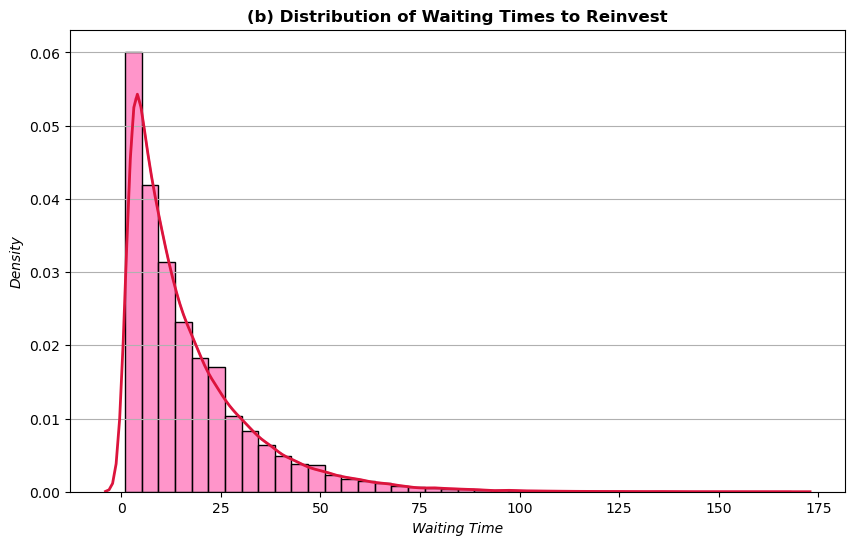

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Expected Waiting Time to Reinvest
plt.figure(figsize=(10, 6))
sns.histplot(waiting_times_all, bins=40, color='hotpink', alpha=0.7, edgecolor='black', kde=True, stat="density")
sns.kdeplot(waiting_times_all, color="crimson", linewidth=2)
plt.title('(b) Distribution of Waiting Times to Reinvest', fontweight='bold')
plt.xlabel('Waiting Time', fontstyle='italic')
plt.ylabel('Density', fontstyle='italic')
plt.grid(axis='y')
plt.show()

<br>

2. **(d) Distribution of Returns from Semi-Uniform Initial Distribution**: Shows the spread of returns, reflecting the gains and losses when the starting state is semi-uniformly distributed.

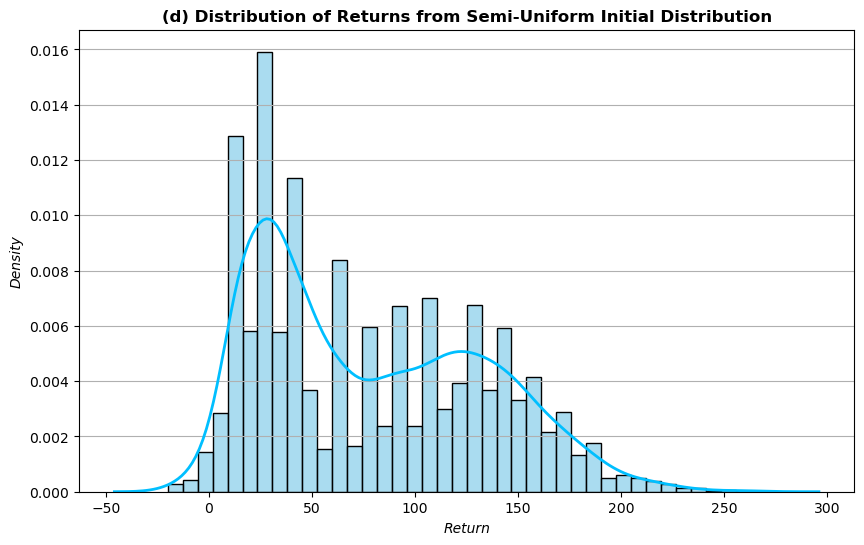

In [67]:
# Histogram for Expected Return from Semi-Uniform Initial Distribution
plt.figure(figsize=(10, 6))
sns.histplot(uniform_total_returns, bins=40, color='skyblue', alpha=0.7, edgecolor='black', stat="density")
sns.kdeplot(uniform_total_returns, color="deepskyblue", linewidth=2)
plt.title('(d) Distribution of Returns from Semi-Uniform Initial Distribution', fontweight='bold')
plt.xlabel('Return', fontstyle='italic')
plt.ylabel('Density', fontstyle='italic')
plt.grid(axis='y')
plt.show()

<br>

***Interpretation of Results***

**(b) Distribution of Waiting Times to Reinvest**

The distribution of waiting times is highly right-skewed, with most reinvestment opportunities occurring within the first 20 steps. This pattern resembles an exponential distribution, suggesting frequent short waiting times and occasional longer delays. This characteristic aligns with the stochastic nature of financial models, where short cycles dominate but are occasionally interrupted by prolonged intervals before reaching the mean price level.

**(d) Distribution of Returns from Semi-Uniform Initial Distribution**

The returns distribution, starting from a semi-uniform spread over states 2, 3, 4, and 5, shows a slight positive skew with a peak around moderate returns. This shape reflects a balanced risk-reward profile, as the recalculated price level for each state iteration introduces variability. The broader spread of outcomes highlights the impact of beginning from diverse states, producing both gains and losses. This variability results in a more dispersed return profile, aligning with the stochastic nature of the market, but ultimately yields lower average returns compared to consistently starting from the mean.

<br>

<br><p><h3> <b>Conclusion</b></h3></p>

In this project, we applied Markov chain theory to simulate price fluctuations of a financial asset, modeling its behavior as a discrete-time Markov process centered around a mean price level. Through defining specific states, transition probabilities, and thresholds for Take-Profit (TP) and Stop-Loss (SL) events, we analyzed key investment outcomes over both short-term and repeated investment horizons. This approach provided insights into hitting probabilities, expected stopping times, and the dynamics of returns under different initial conditions, offering a probabilistic perspective on investment decisions in volatile markets.

Our findings underscore the importance of starting conditions and reinvestment strategies. Starting consistently from the mean price level yields higher returns and more frequent reinvestment opportunities, making it a favorable strategy within this stochastic setup. In contrast, a semi-uniform distribution across multiple states leads to greater variability, with returns influenced by both favorable and adverse initial positions, resulting in a more balanced but less profitable outcome. These insights emphasize how the Markov chain framework can capture the impact of different initial states on risk and reward, offering a structured approach to understanding price-driven investment strategies.

The project demonstrates how Markov models, paired with Monte Carlo simulations, serve as powerful tools for financial modeling, helping investors explore the trade-offs of different strategies within uncertain environments.